In [25]:
from qiskit import QuantumRegister, ClassicalRegister, BasicAer
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import NormalDistribution,UniformDistribution,LogNormalDistribution
from kaleidoscope import qsphere, probability_distribution

In [26]:
#provider = IBMQ.load_account()
#backend = provider.get_backend('ibmq_qasm_simulator')
backend = BasicAer.get_backend('qasm_simulator')

qubits = 5

## Normal Distribution

A circuit to encode a discretized normal distribution in qubit amplitudes.

The probability density function of the normal distribution is defined as

$$ \mathbb{P}(X = x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{\sigma^2}} $$

https://qiskit.org/documentation/stubs/qiskit.circuit.library.NormalDistribution.html#qiskit.circuit.library.NormalDistribution

![Normal Distribution](normal_dist.png)


 Normal Distribution
-----------------
Job Status: job has successfully run
{'01011': 446, '01110': 617, '01111': 689, '10010': 598, '10101': 365, '11001': 103, '10100': 403, '00101': 66, '01100': 555, '10000': 650, '01010': 355, '01101': 591, '00110': 107, '01000': 186, '01001': 275, '10110': 291, '10001': 635, '11000': 153, '10011': 498, '00100': 48, '10111': 205, '11011': 35, '11010': 60, '00111': 151, '11100': 34, '11101': 15, '00001': 10, '00010': 14, '00011': 25, '00000': 6, '11111': 2, '11110': 4}


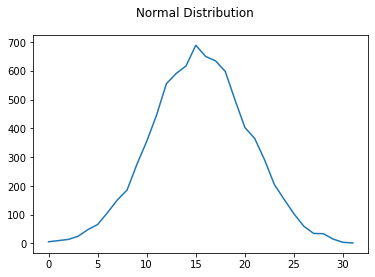

In [67]:
q = QuantumRegister(qubits,'q')
c = ClassicalRegister(qubits,'c')

print("\n Normal Distribution")
print("-----------------")

circuit = QuantumCircuit(q,c)
normal = NormalDistribution(num_qubits = qubits, mu=0, sigma=0.1, bounds=([-1,1]))
circuit.append(normal, list(range(qubits)))
circuit.measure(q,c)

job = execute(circuit, backend, shots=8192)
job_monitor(job)
counts = job.result().get_counts()

print(counts)
sortedcounts = []
sortedkeys = sorted(counts)

for i in sortedkeys:
    for j in counts:
        if(i == j):
            sortedcounts.append(counts.get(j))

plt.suptitle('Normal Distribution')
plt.plot(sortedcounts)
plt.show()



In [68]:
probability_distribution(counts)

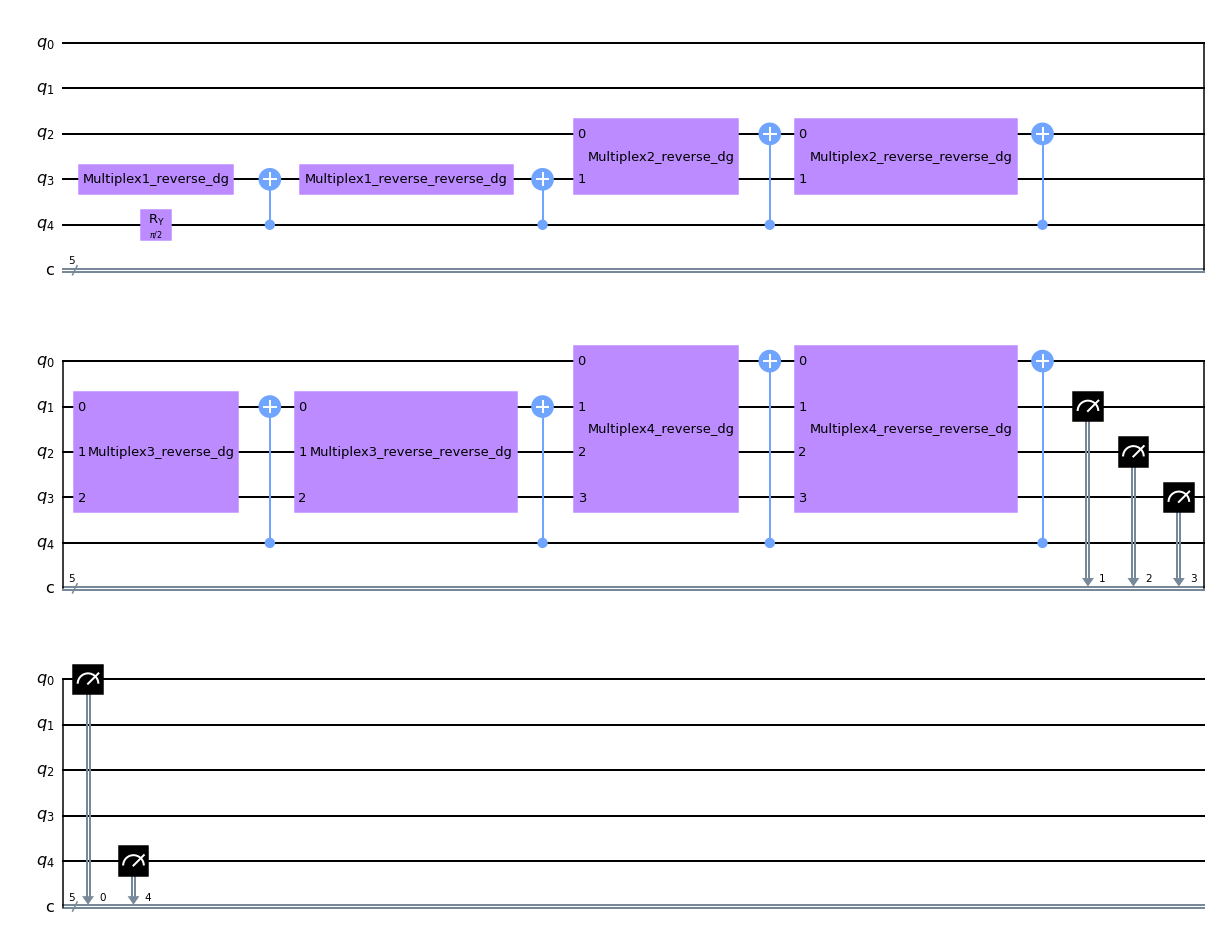

In [41]:
circuit.decompose().decompose().draw('mpl')

## Uniform Distribution

$$ \mathcal{P}_X |0\rangle^{\otimes n} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n - 1} |x\rangle $$

https://qiskit.org/documentation/stubs/qiskit.circuit.library.UniformDistribution.html#qiskit.circuit.library.UniformDistribution

![Uniform Distribution](uniform_dist.png)


 Uniform Distribution
-----------------
Job Status: job has successfully run
{'11101': 235, '11100': 223, '10111': 259, '11111': 267, '01101': 255, '01000': 240, '00011': 254, '11001': 242, '10000': 242, '10010': 249, '10001': 265, '01001': 267, '01110': 259, '00100': 253, '00000': 263, '01100': 246, '01011': 228, '00001': 266, '01111': 278, '00110': 263, '00101': 268, '10101': 248, '00010': 270, '11110': 282, '10011': 266, '00111': 245, '11000': 282, '11011': 275, '11010': 273, '10110': 253, '10100': 242, '01010': 234}


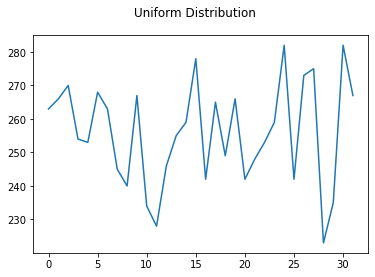

In [59]:
print("\n Uniform Distribution")
print("-----------------")

circuit = QuantumCircuit(q,c)
uniform = UniformDistribution(num_qubits = qubits)
circuit.append(uniform, list(range(qubits)))
circuit.measure(q,c)

job = execute(circuit, backend, shots=8192)
job_monitor(job)
counts = job.result().get_counts()

print(counts)

sortedcounts = []
sortedkeys = sorted(counts)

for i in sortedkeys:
    for j in counts:
        if(i == j):
            sortedcounts.append(counts.get(j))
            
plt.suptitle('Uniform Distribution')
plt.plot(sortedcounts)
plt.show()


In [56]:
probability_distribution(counts)

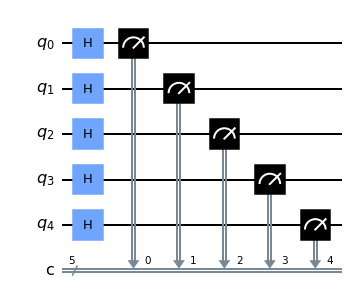

In [37]:
circuit.decompose().draw('mpl')

## Log Normal Distribution

$$ \mathbb{P}(X = x) = \frac{1}{x\sqrt{2\pi\sigma^2}} e^{-\frac{(\log(x) - \mu)^2}{\sigma^2}} $$ 

https://qiskit.org/documentation/stubs/qiskit.circuit.library.LogNormalDistribution.html#qiskit.circuit.library.LogNormalDistribution

![Logaritmic Distribution](log_dist.png)


 Log-Normal Distribution
-----------------
Job Status: job has successfully run
{'01011': 1071, '01111': 693, '10000': 535, '01101': 1109, '01100': 1258, '01110': 981, '01010': 783, '10001': 385, '01000': 206, '01001': 476, '10101': 66, '11000': 11, '10010': 244, '10110': 31, '10100': 114, '10011': 135, '00111': 56, '11001': 7, '10111': 21, '11010': 1, '00110': 7, '11111': 1, '11011': 1}


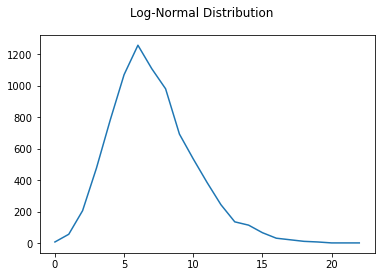

In [152]:
print("\n Log-Normal Distribution")
print("-----------------")

circuit = QuantumCircuit(q,c)
lognorm = LogNormalDistribution(num_qubits = qubits, mu=0.5, sigma=0.05, bounds=([0,4]))
circuit.append(lognorm, list(range(qubits)))
circuit.measure(q,c)

job = execute(circuit, backend, shots=8192)
job_monitor(job)
counts = job.result().get_counts()

print(counts)

sortedcounts = []
sortedkeys = sorted(counts)

for i in sortedkeys:
    for j in counts:
        if(i == j):
            sortedcounts.append(counts.get(j))

plt.suptitle('Log-Normal Distribution')
plt.plot(sortedcounts)
plt.show()

In [153]:
probability_distribution(counts)

## Gaussian Conditional Independence Model

Given a value 𝑧 sampled from a latent random variable 𝑍 following a standard normal distribution, the default probability of asset 𝑘 is given by

$$ p_k(z) = F\left( \frac{F^{-1}(p_k^0) - \sqrt{\rho_k}z}{\sqrt{1 - \rho_k}} \right) $$

F denotes the cumulative distribution function of 𝑍, 𝑝0𝑘 is the default probability of asset 𝑘 for 𝑧=0 and 𝜌𝑘 is the sensitivity of the default probability of asset 𝑘 with respect to 𝑍. Thus, given a concrete realization of 𝑍 the individual default events are assumed to be independent from each other.

https://qiskit.org/documentation/tutorials/finance/09_credit_risk_analysis.html?highlight=gaussian%20conditional


 Gaussian Conditional Independence Distribution
-----------------
Job Status: job has successfully run
{'1001111': 205, '0010000': 715, '0010100': 276, '0010101': 166, '0001110': 543, '1001100': 141, '1010000': 237, '0010110': 96, '0001100': 300, '1010001': 189, '0001101': 432, '1001101': 176, '0110001': 59, '1110000': 29, '0101101': 120, '1001011': 111, '0101100': 90, '1010100': 48, '0101011': 67, '0010010': 542, '1101110': 50, '0110010': 54, '0010011': 454, '1010010': 121, '0001111': 675, '1001110': 199, '0101110': 108, '1010101': 29, '0001010': 96, '0010001': 674, '0101111': 107, '0110000': 98, '1101010': 29, '0001011': 190, '1101011': 26, '0110101': 5, '1101101': 44, '0101010': 41, '1101111': 39, '0101000': 12, '1010011': 87, '1110001': 25, '0001000': 22, '1001010': 70, '1101100': 41, '1101001': 19, '1001001': 34, '1110010': 9, '0100111': 5, '1010110': 10, '1100110': 2, '0001001': 53, '0101001': 26, '1000111': 6, '0011000': 19, '1000011': 1, '1010111': 5, '0011001': 5, '0000101': 

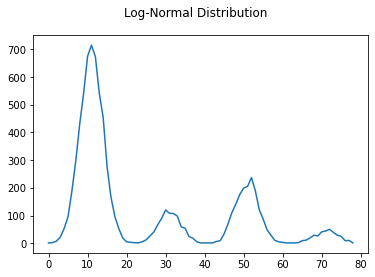

In [82]:
from qiskit.finance.applications import GaussianConditionalIndependenceModel as GCI

print("\n Gaussian Conditional Independence Distribution")
print("-----------------")

# set problem parameters
n_z = qubits
z_max = qubits
#p_zeros = [0.15, 0.25, 0.09, 0.05, 0.01]
#rhos = [0.1, 0.05, 0.04, 0.03, 0.01]

p_zeros = [0.15, 0.25]
rhos = [0.1, 0.05]

circuit = GCI(n_z, z_max, p_zeros, rhos)

circuit.measure_all()

job = execute(circuit, backend, shots=8192)
job_monitor(job)
counts = job.result().get_counts()

print(counts)

sortedcounts = []
sortedkeys = sorted(counts)

for i in sortedkeys:
    for j in counts:
        if(i == j):
            sortedcounts.append(counts.get(j))

plt.suptitle('Log-Normal Distribution')
plt.plot(sortedcounts)
plt.show()



In [84]:
probability_distribution(counts)

In [85]:
from qiskit.aqua.algorithms import AmplitudeEstimation

In [131]:
estimation_qubits = 4
ae_lognormal = AmplitudeEstimation(estimation_qubits, state_preparation=lognorm)
ae_uniform = AmplitudeEstimation(estimation_qubits, state_preparation=uniform)
ae_normal = AmplitudeEstimation(estimation_qubits, state_preparation=normal)

In [132]:
result_lognormal = ae_lognormal.run(quantum_instance=BasicAer.get_backend('qasm_simulator'))
result_uniform = ae_uniform.run(quantum_instance=BasicAer.get_backend('qasm_simulator'))
result_normal = ae_normal.run(quantum_instance=BasicAer.get_backend('qasm_simulator'))

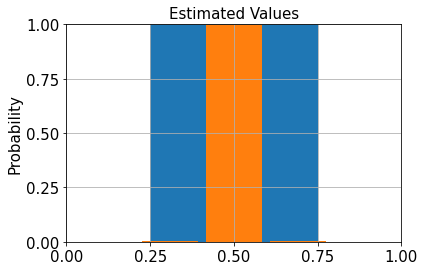

In [135]:
# plot estimated values

plt.bar(result_uniform['mapped_a_samples'], result_uniform['probabilities'], width=0.5/len(result_uniform['probabilities']))
plt.bar(result_lognormal['mapped_a_samples'], result_lognormal['probabilities'], width=0.5/len(result_lognormal['probabilities']))
#plt.bar(result_normal['mapped_a_samples'], result_normal['probabilities'], width=0.5/len(result_normal['probabilities']))
plt.xticks([0, 0.25, 0.5, 0.75, 1], size=15)
plt.yticks([0, 0.25, 0.5, 0.75, 1], size=15)
plt.title('Estimated Values', size=15)
plt.ylabel('Probability', size=15)
plt.ylim((0,1))
plt.grid()
plt.show()

In [137]:
print(result_lognormal)
print(result_uniform)
print(result_normal)

{'a_estimation': 0.5, 'confidence_interval': [0.4890035121702967, 0.5112095025486749], 'estimation': 0.5, 'num_oracle_queries': 15360, 'ml_value': 0.5076540093076485, 'mapped_a_samples': [0.3086583, 0.5, 0.6913417], 'probabilities': [0.001953125, 0.9951171875, 0.0029296875], 'shots': 1024, 'mle': 0.5076540093076485, 'circuit_result': {'0011': 492, '0010': 527, '1101': 3, '1011': 1, '1100': 1}, 'a_samples': [(0.3086583, 0.001953125), (0.5, 0.9951171875), (0.6913417, 0.0029296875)], 'y_measurements': [(3, 0.0009765625), (4, 0.5146484375), (11, 0.0029296875), (12, 0.48046875), (13, 0.0009765625)], 'mapped_values': [0.3086583, 0.5, 0.6913417], 'max_probability': 0.9951171875}
{'a_estimation': 0.5, 'confidence_interval': [0.4952750743253639, 0.5047249256746361], 'estimation': 0.5, 'num_oracle_queries': 15360, 'ml_value': 0.5, 'mapped_a_samples': [0.5], 'probabilities': [1.0], 'shots': 1024, 'mle': 0.5, 'circuit_result': {'0010': 492, '0011': 532}, 'a_samples': [(0.5, 1.0)], 'y_measurements'

In [154]:
estimation_qubits = 7
ae_lognormal = AmplitudeEstimation(estimation_qubits, state_preparation=lognorm)
result_lognormal = ae_lognormal.run(quantum_instance=BasicAer.get_backend('qasm_simulator'))

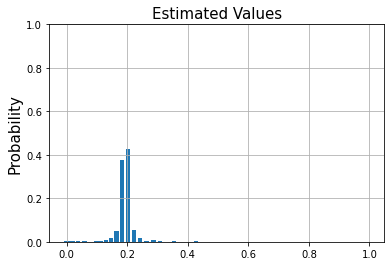

In [156]:

plt.bar(result_lognormal['mapped_a_samples'], result_lognormal['probabilities'], width=0.5/len(result_lognormal['probabilities']))
plt.title('Estimated Values', size=15)
plt.ylabel('Probability', size=15)
plt.ylim((0,1))
plt.grid()